<a href="https://colab.research.google.com/github/prabhat-parth/Real-time-heterogeneity-activity-recognition/blob/master/HETRO_PHONE_ACCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 38kB/s 
     |████████████████████████████████| 512kB 38.7MB/s 
     |████████████████████████████████| 3.8MB 41.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=73a4ae16555d071fc574518babd0b8c24e51922738c927f5e3b1975c338ca1a3
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow 2.2.0rc3
    Uninstalling tensorflow-2.2.0rc3:
      Successfully uninstalled tensorflow-2.2.0rc

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

1.15.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/HETRO_DATA/Activity recognition exp/Activity recognition exp/Phones_accelerometer.csv")
data.head()
data.shape


(13062475, 10)

In [4]:
#Check for Duplicates
print('No of duplicates in DATA: {}'.format(sum(data.duplicated())))


No of duplicates in DATA: 0


In [5]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(data.isnull().values.sum()))

We have 1783200 NaN/Null values in data


In [0]:
#sns.heatmap(data.isnull(), cbar=False)

In [0]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace= True)

In [0]:
#sns.heatmap(data.isnull(), cbar=False)

In [9]:
#Checking for NaN/null values
print('We have {} NaN/Null values in data'.format(data.isnull().values.sum()))
data.shape

We have 0 NaN/Null values in data


(11279275, 10)

In [10]:
#data = data.drop(['Arrival_Time'], axis = 1).copy()
data.shape

(11279275, 10)

In [11]:
data.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand


In [12]:
#data = data.drop(['Index','Creation_Time','User','Model','Device'], axis = 1).copy()
data.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand


In [13]:
data['gt'].value_counts()

walk          2192401
sit           1991919
stand         1851492
bike          1845557
stairsup      1782010
stairsdown    1615896
Name: gt, dtype: int64

In [14]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')
data.info()
data.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11279275 entries, 0 to 13062474
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Index          int64  
 1   Arrival_Time   int64  
 2   Creation_Time  int64  
 3   x              float64
 4   y              float64
 5   z              float64
 6   User           object 
 7   Model          object 
 8   Device         object 
 9   gt             object 
dtypes: float64(3), int64(3), object(4)
memory usage: 946.6+ MB


(11279275, 10)

In [15]:
Fs = 20
gt= data['gt'].value_counts().index
gt

Index(['walk', 'sit', 'stand', 'bike', 'stairsup', 'stairsdown'], dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['label'] = label.fit_transform(data['gt'])
data.head()

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt,label
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand,4
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand,4
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand,4
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand,4
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand,4


In [17]:
label.classes_

array(['bike', 'sit', 'stairsdown', 'stairsup', 'stand', 'walk'],
      dtype=object)

In [18]:
X = data[['x', 'y', 'z']]
y = data['label']
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,-1.105237,0.345730,-0.340154,4
1,-1.103729,0.334192,-0.339632,4
2,-1.114581,0.323423,-0.309885,4
3,-1.101318,0.338038,-0.343285,4
4,-1.113677,0.315731,-0.340154,4
...,...,...,...,...
11279270,0.753091,0.000076,0.459814,0
11279271,0.753091,0.000076,0.392627,0
11279272,0.791899,0.000076,0.392627,0
11279273,0.791899,-0.098951,0.459814,0


In [19]:
label.classes_

array(['bike', 'sit', 'stairsdown', 'stairsup', 'stand', 'walk'],
      dtype=object)

In [0]:
Fs = 50
frame_size = Fs*4 # 200
hop_size = Fs*2 # 200


In [0]:
import math as m
def get_frames(data, frame_size, hop_size):

  N_FEATURES = 3
  frames = []
  labels = []
  for i in range(0, len(scaled_X) - frame_size, hop_size):
    x = data['x'].values[i: i + frame_size]
    y = data['y'].values[i: i + frame_size]
    z = data['z'].values[i: i + frame_size]
        # Retrieve the most often used label in this segment
    label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]
    frames.append([x, y, z])
    labels.append(label)
  # Bring the segments into a better shape
  frames = np.asarray(frames, dtype= np.float32).reshape(-1, frame_size, N_FEATURES)
  labels = np.asarray(labels)
  return frames, labels


In [0]:
X,y = get_frames(scaled_X, frame_size, hop_size)

In [23]:
X.shape
y.shape

(112791,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, stratify = y)


In [25]:
X_train.shape, X_test.shape

((90232, 200, 3), (22559, 200, 3))

In [26]:
X_train = X_train.reshape(90232, 200, 3,1)
X_test = X_test.reshape(22559, 200, 3,1)
X_train[0].shape, X_test[0].shape

((200, 3, 1), (200, 3, 1))

In [27]:
# Importing libraries
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

Using TensorFlow backend.


In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu',input_shape=X_train[0].shape))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 3, 16)        160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 3, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 1, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1639424   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
______________________________________

In [0]:
from keras import optimizers
sgd = optimizers.adam(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [30]:
history = model.fit(X_train, y_train, epochs =30, validation_data= (X_test, y_test),batch_size=64, verbose=1)


Train on 90232 samples, validate on 22559 samples
Epoch 1/30
90232/90232 [==============================] - 12s 138us/step - loss: 0.6098 - accuracy: 0.7827 - val_loss: 0.3742 - val_accuracy: 0.9032
Epoch 2/30
90232/90232 [==============================] - 6s 72us/step - loss: 0.3073 - accuracy: 0.9001 - val_loss: 0.2685 - val_accuracy: 0.9275
Epoch 3/30
90232/90232 [==============================] - 6s 71us/step - loss: 0.2411 - accuracy: 0.9225 - val_loss: 0.2243 - val_accuracy: 0.9418
Epoch 4/30
90232/90232 [==============================] - 6s 71us/step - loss: 0.1995 - accuracy: 0.9358 - val_loss: 0.1920 - val_accuracy: 0.9497
Epoch 5/30
90232/90232 [==============================] - 7s 75us/step - loss: 0.1725 - accuracy: 0.9447 - val_loss: 0.1742 - val_accuracy: 0.9529
Epoch 6/30
90232/90232 [==============================] - 7s 74us/step - loss: 0.1564 - accuracy: 0.9490 - val_loss: 0.1693 - val_accuracy: 0.9505
Epoch 7/30
90232/90232 [==============================] - 6s 72us

In [33]:
#history.history['accuracy']
history.history['val_accuracy']

[0.9032315015792847,
 0.9274790287017822,
 0.9418413639068604,
 0.9496874809265137,
 0.9529234170913696,
 0.9505296945571899,
 0.9574006199836731,
 0.959617018699646,
 0.9613901376724243,
 0.962631344795227,
 0.9632962346076965,
 0.9636508822441101,
 0.9649807214736938,
 0.9640054702758789,
 0.9663991928100586,
 0.9663105607032776,
 0.96701979637146,
 0.965955913066864,
 0.9671527743339539,
 0.9687929153442383,
 0.9680836796760559,
 0.968039333820343,
 0.9685269594192505,
 0.967950701713562,
 0.9704331159591675,
 0.969014585018158,
 0.9714526534080505,
 0.970034122467041,
 0.971186637878418,
 0.9701228141784668]

In [34]:
history.history['loss']
#history.history['val_loss']

[0.6098054620335844,
 0.3072681027779248,
 0.2410874068948413,
 0.1994521690710754,
 0.1725360505604577,
 0.1564367444481777,
 0.14041745322363017,
 0.1318850499906537,
 0.12110803097615967,
 0.11163478129795124,
 0.1047949937294192,
 0.09893910235756968,
 0.09268427276158969,
 0.08914242748388089,
 0.08443203791335221,
 0.08004214768278566,
 0.07720315665196882,
 0.07444723331674065,
 0.06923926316111849,
 0.06746130608869726,
 0.06622409664595821,
 0.060265745739729565,
 0.059365712540718464,
 0.057099785301175425,
 0.05612108230432944,
 0.0522589561056241,
 0.05216573743804099,
 0.05021634303520193,
 0.049251838900830576,
 0.04712686886473723]

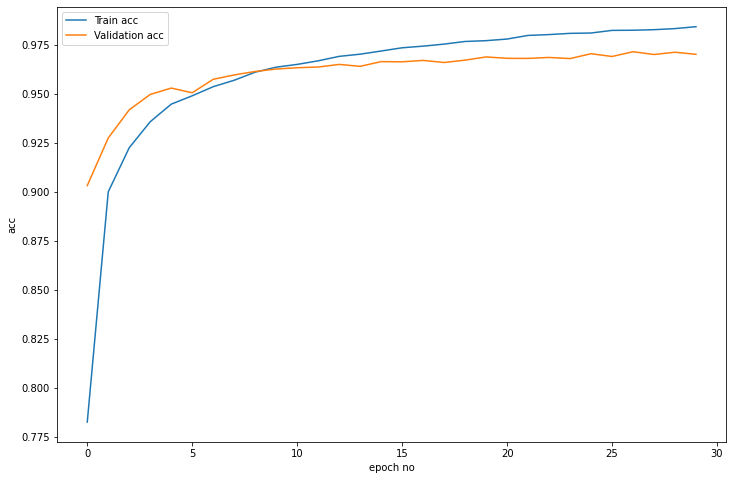

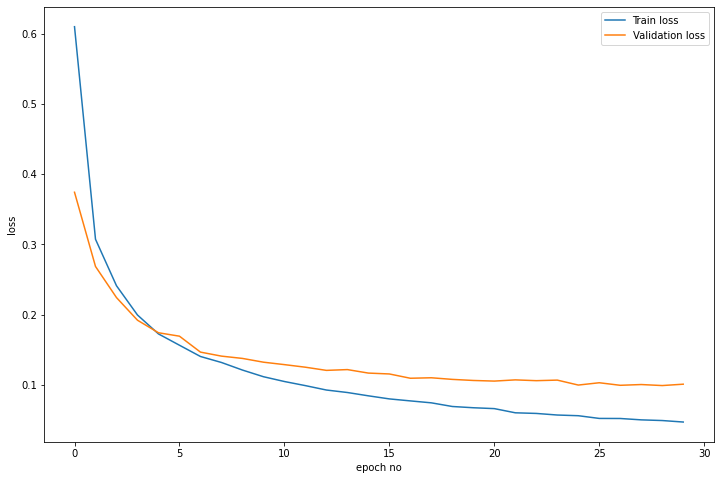

In [37]:
import matplotlib.pyplot as plt1

# Plot training & validation accuracy values
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'],label='Train acc')
plt.plot(history.history['val_accuracy'],label = 'Validation acc')
plt.xlabel('epoch no')
plt.ylabel('acc')
plt.legend()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label = 'Validation loss')
plt.xlabel('epoch no')
plt.ylabel('loss')
plt.legend()
plt.show()


[[3618    8   26   17   12   10]
 [   2 3971    0    1   10    1]
 [   8    0 3003  146    1   71]
 [   4    0   95 3404    1   62]
 [  27   22    1    1 3652    0]
 [   8    0   65   73    2 4237]]
0.9701227891307239
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3691
           1       0.99      1.00      0.99      3985
           2       0.94      0.93      0.94      3229
           3       0.93      0.95      0.94      3566
           4       0.99      0.99      0.99      3703
           5       0.97      0.97      0.97      4385

    accuracy                           0.97     22559
   macro avg       0.97      0.97      0.97     22559
weighted avg       0.97      0.97      0.97     22559



(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6035dc7860>)

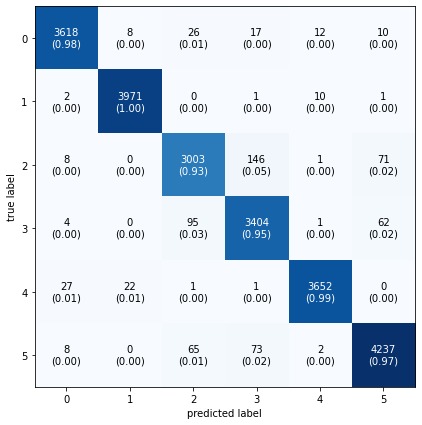

In [38]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

y_pred = model.predict_classes(X_test)
mat = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

plot_confusion_matrix(conf_mat=mat, show_normed=True,cmap=plt.cm.Blues,show_absolute=True, figsize=(7,7))

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


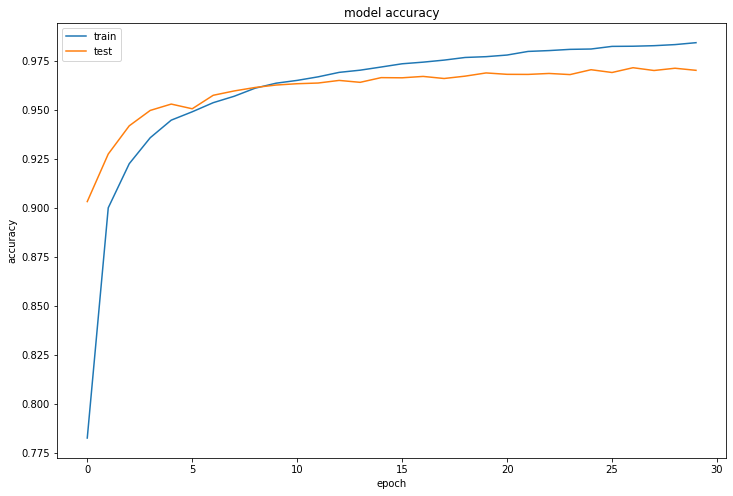

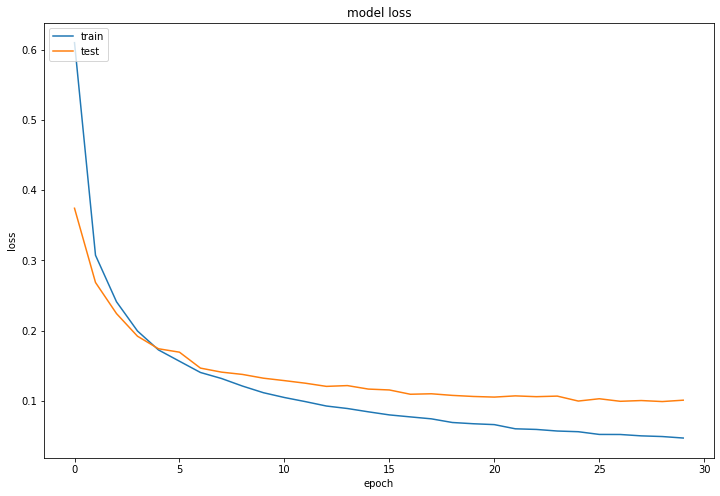

In [41]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

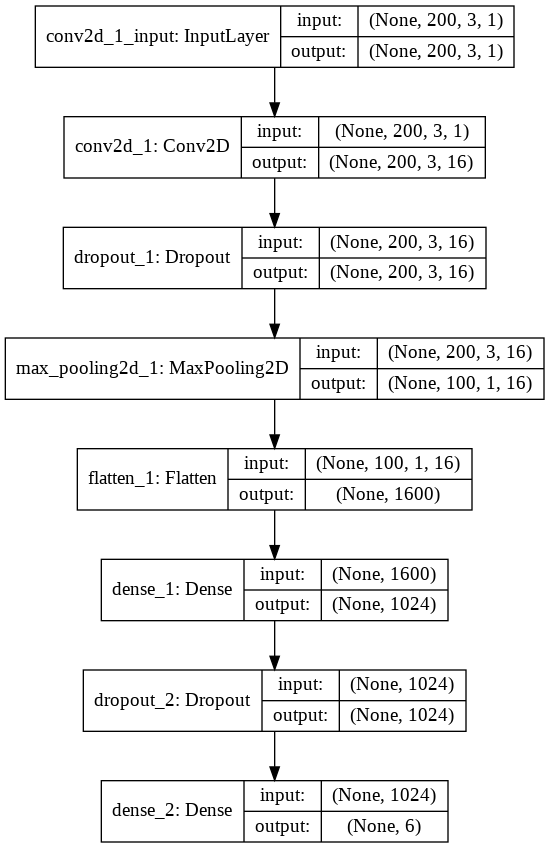

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [43]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

fruits = [64,128,256,512,1024]
for x in fruits:
  print(x)

  model = Sequential()
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',input_shape=X_train[0].shape))
  model.add(Dropout(0.3))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(6, activation='softmax'))
  model.summary()
  sgd = optimizers.adam(lr=0.0001)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs =30, validation_data= (X_test, y_test),batch_size=x, verbose=1)  
  y_pred = model.predict_classes(X_test)
  mat = confusion_matrix(y_test, y_pred)
  print(confusion_matrix(y_test, y_pred))
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))



64
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 200, 3, 64)        640       
_________________________________________________________________
dropout_3 (Dropout)          (None, 200, 3, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 1, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              6554624   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)             

In [44]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import optimizers

fruits = [0.0001,0.001,0.01,0.1,1.0]
for x in fruits:
  print(x)
  model = Sequential()
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',input_shape=X_train[0].shape))
  model.add(Dropout(0.3))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(6, activation='softmax'))
  model.summary() 
  sgd = optimizers.adam(lr=x)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs =30, validation_data= (X_test, y_test),batch_size=64, verbose=1)  
  y_pred = model.predict_classes(X_test)
  mat = confusion_matrix(y_test, y_pred)
  print(confusion_matrix(y_test, y_pred))
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))

0.0001
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 200, 3, 64)        640       
_________________________________________________________________
dropout_13 (Dropout)         (None, 200, 3, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 100, 1, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              6554624   
_________________________________________________________________
dropout_14 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 6)         

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train on 90232 samples, validate on 22559 samples
Epoch 1/30
90232/90232 [==============================] - 10s 109us/step - loss: 7689.2445 - accuracy: 0.1814 - val_loss: 33.4591 - val_accuracy: 0.1579
Epoch 2/30
90232/90232 [==============================] - 9s 105us/step - loss: 5680.4722 - accuracy: 0.1786 - val_loss: 1.8305 - val_accuracy: 0.1431
Epoch 3/30
90232/90232 [==============================] - 10s 108us/step - loss: 1316.9417 - accuracy: 0.1750 - val_loss: 7.9477 - val_accuracy: 0.1945
Epoch 4/30
90232/90232 [==============================] - 10s 109us/step - loss: 5224.9095 - accuracy: 0.1737 - val_loss: 157.1284 - val_accuracy: 0.1947
Epoch 5/30
90232/90232 [==============================] - 9s 105us/step - loss: 305.4934 - accuracy: 0.1734 - val_loss: 1.8499 - val_accuracy: 0.1767
Epoch 6/30
90232/90232 [==============================] - 9s 105us/step - loss: 61.9592 - accuracy: 0.1739 - val_loss: 1.8971 - val_accuracy: 0.1944
Epoch 7/30
90232/90232 [=================

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
